In [0]:
import pandas as pd
import numpy as np
import chess
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math
import chess

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
pawnEval = [[0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
            [5.0,  5.0,  5.0,  5.0,  5.0,  5.0,  5.0,  5.0],
            [1.0,  1.0,  2.0,  3.0,  3.0,  2.0,  1.0,  1.0],
            [0.5,  0.5,  1.0,  2.5,  2.5,  1.0,  0.5,  0.5],
            [0.0,  0.0,  0.0,  2.0,  2.0,  0.0,  0.0,  0.0],
            [0.5, -0.5, -1.0,  0.0,  0.0, -1.0, -0.5,  0.5],
            [0.5,  1.0, 1.0,  -2.0, -2.0,  1.0,  1.0,  0.5],
            [0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0]]

knightEval = [[-5.0, -4.0, -3.0, -3.0, -3.0, -3.0, -4.0, -5.0],
              [-4.0, -2.0,  0.0,  0.0,  0.0,  0.0, -2.0, -4.0],
              [-3.0,  0.0,  1.0,  1.5,  1.5,  1.0,  0.0, -3.0],
              [-3.0,  0.5,  1.5,  2.0,  2.0,  1.5,  0.5, -3.0],
              [-3.0,  0.0,  1.5,  2.0,  2.0,  1.5,  0.0, -3.0],
              [-3.0,  0.5,  1.0,  1.5,  1.5,  1.0,  0.5, -3.0],
              [-4.0, -2.0,  0.0,  0.5,  0.5,  0.0, -2.0, -4.0],
              [-5.0, -4.0, -3.0, -3.0, -3.0, -3.0, -4.0, -5.0]]
bishopEval = [[ -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0],
                    [ -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0],
                    [ -1.0,  0.0,  0.5,  1.0,  1.0,  0.5,  0.0, -1.0],
                    [ -1.0,  0.5,  0.5,  1.0,  1.0,  0.5,  0.5, -1.0],
                    [ -1.0,  0.0,  1.0,  1.0,  1.0,  1.0,  0.0, -1.0],
                    [ -1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0, -1.0],
                    [ -1.0,  0.5,  0.0,  0.0,  0.0,  0.0,  0.5, -1.0],
                    [ -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0]]
rookEval= [[  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
           [  0.5,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  0.5],
           [ -0.5,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.5],
           [ -0.5,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.5],
           [ -0.5,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.5],
           [ -0.5,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.5],
           [ -0.5,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -0.5],
           [  0.0,   0.0, 0.0,  0.5,  0.5,  0.0,  0.0,  0.0]]
queenEval = [[ -2.0, -1.0, -1.0, -0.5, -0.5, -1.0, -1.0, -2.0],
            [ -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0],
            [ -1.0,  0.0,  0.5,  0.5,  0.5,  0.5,  0.0, -1.0],
            [ -0.5,  0.0,  0.5,  0.5,  0.5,  0.5,  0.0, -0.5],
            [  0.0,  0.0,  0.5,  0.5,  0.5,  0.5,  0.0, -0.5],
            [ -1.0,  0.5,  0.5,  0.5,  0.5,  0.5,  0.0, -1.0],
            [ -1.0,  0.0,  0.5,  0.0,  0.0,  0.0,  0.0, -1.0],
            [ -2.0, -1.0, -1.0, -0.5, -0.5, -1.0, -1.0, -2.0]]

kingEval = [[ -3.0, -4.0, -4.0, -5.0, -5.0, -4.0, -4.0, -3.0],
            [ -3.0, -4.0, -4.0, -5.0, -5.0, -4.0, -4.0, -3.0],
            [ -3.0, -4.0, -4.0, -5.0, -5.0, -4.0, -4.0, -3.0],
            [ -3.0, -4.0, -4.0, -5.0, -5.0, -4.0, -4.0, -3.0],
            [ -2.0, -3.0, -3.0, -4.0, -4.0, -3.0, -3.0, -2.0],
            [ -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -1.0],
            [  2.0,  2.0,  0.0,  0.0,  0.0,  0.0,  2.0,  2.0 ],
            [  2.0,  3.0,  1.0,  0.0,  0.0,  1.0,  3.0,  2.0 ]]

In [0]:
def Define_Firsthand(record):
  target = "[a-z][0-9]"
  first_location = int(str(re.search(target, record)[0])[1])
  if first_location <= 4 :
    first = 'White'
  else:
    first = 'Black'
  return first

def generate_eval_list(record, return_white=True):
  target = "eval\s\#?[-+]?\d{1,2}\.?\d{1,2}"
  match_eval = re.findall(target, record)
  white_eval = []
  black_eval = []
  for i in range(len(match_eval)):
    try:
      local_eval = float(match_eval[i][5:].strip('#'))
    except:
      local_eval = float(match_eval[i][5:])
    if i%2 == 0:
      white_eval.append(local_eval)
    else:
      black_eval.append(local_eval)
  if return_white:
    return white_eval
  else:
    return black_eval

def generate_clock_list(record, return_white=True):
  target = "\d{1,2}:\d{1,2}:\d{1,2}"
  match_obj = re.findall(target, record)
  white_clock = []
  black_clock = []
  for i in range(len(match_obj)):
    if i%2 == 0:
      white_clock.append(match_obj[i])
    else:
      black_clock.append(match_obj[i])
 
  if return_white:
    return white_clock
  else:
    return black_clock

def generate_position_list(record):
  match1 = re.findall("\s\{\s\[%eval\s\#?[-+]?[0-9]*\.?[0-9]+\]\s\[%clk\s\d{1,2}:\d{1,2}:\d{1,2}\]\s\}",record)
  match2 = re.findall("\d{2}\.",record)
  match3 = re.findall("\d\.",record)
  match = match1 + match2 + match3

  for m in match:
    record = record.replace(m,'')
  record = record.replace('..','').split(' ')
  record = [elmt for elmt in record if elmt != '' and elmt[0].isalpha()]
  return record

def generate_final_location(transcript, return_matrix=False):
  board = chess.Board()
  for elmt in transcript:
    try:
      elmt = elmt.strip('?!')
    except:
      pass
    board.push_san(elmt)
  if return_matrix:
    board_matrix = np.asarray(str(board).replace('\n',' ').split(' ')).reshape(8,8)
    return board_matrix
  else:
    return board

def result(result_string, white=True):
  if white:
    try:
      result_num = int(result_string.split('-')[0])
    except:
      result_num = 0.5
    return result_num
  else:
    try:
      result_num = int(result_string.split('-')[1])
    except:
      result_num = 0.5
    return result_num

def split_transcript(transcript, iswhite=True):
  if iswhite:
    return transcript[::2]
  else:
    return transcript[1::2]

def generate_reference_time(clock_list, return_game_length=False):
  reference_time = []
  for clock in clock_list:
    hour_minute_second = clock.split(':')
    hour,minute,second = int(hour_minute_second[0]), int(hour_minute_second[1]), int(hour_minute_second[2])
    reference_time.append(3600*hour+minute*60+second)
  if return_game_length:
    try:
      return np.abs(reference_time[0]-reference_time[-1])
    except:
      return np.NaN
  else:
    return reference_time

def string2num(dataframe):
  column_list = dataframe.columns
  for column in column_list:
    if column == 'TIME_CONTROL':
      continue
    try:
      dataframe[column].iloc[0][0].isalpha()
      for i,content in enumerate(dataframe[column].unique()):
        dataframe[column] = dataframe[column].replace(content, i+1)
        try:
          string2num_dict[column][content] = i+1
        except:
          string2num_dict[column] = {}
          string2num_dict[column][content] = i+1
    except:
      pass
  return dataframe

def steps_for_material(transcript, King=False, Queen=False, Knight=False, Bishoop=False, Rook=False, Pawn=False):
  king = 0
  queen = 0
  knight = 0
  bishoop = 0
  rook = 0
  steps = len(transcript)
  for t in transcript:
    if 'K' in t:
      king = king + 1
    elif 'Q' in t:
      queen = queen = 1
    elif 'N' in t:
      knight = knight + 1
    elif 'B' in t:
      bishoop = bishoop + 1
    elif 'R' in t:
      rook = rook + 1
  pawn = pawn = steps - king - queen - knight - bishoop - rook

  if King:
    return king
  elif Queen:
    return queen
  elif Knight:
    return knight
  elif Bishoop:
    return bishoop
  elif Rook:
    return rook
  elif Pawn:
    return pawn

def claim_draw(result):
  if result == 0.5:
    return 1
  else:
    return 0

def gen_benchmark_quality(e1, e2):
  mean = (e1+e2)/2
  std = math.sqrt(math.pow(e1  -mean, 2) + math.pow(e2 - mean, 2))/4
  res = mean -std
  return res

def get_num_of_piece(board):
  num = 0
  for i in range(0, 64):
    if board.piece_at(i) is not None:
      num = num+1
  return num

def pred_quality(board):
  totalEvaluation = 0
  for i in range(0, 64):
    totalEvaluation = totalEvaluation + get_piece_value(board, i)
  num = get_num_of_piece(board)
  res = totalEvaluation/num
  return res

def get_piece_value(board, i):
  x = int(i/8)
  y = i%8
  if board.piece_at(i) is None:
    return 0
  if board.piece_at(i).color == True:
    piece = board.piece_type_at(i)
    if (piece == 1):
      return int(10 + pawnEval[y][x])
    if (piece == 4):
      return int(50 + rookEval[y][x])
    if (piece == 2):
      return int(30 + knightEval[y][x])
    if (piece == 3):
      return int(30 + bishopEval[y][x])
    if (piece == 5):
      return int(90 + queenEval[y][x])
    if (piece == 6):
      return int(900 + kingEval[y][x])
  if board.piece_at(i).color == False:
    piece = board.piece_type_at(i)
    if (piece == 1):
      return int(10 + pawnEval[7-y][x])
    if (piece == 4):
      return int(50 + rookEval[7-y][x])
    if (piece == 2):
      return int(30 + knightEval[7-y][x])
    if (piece == 3):
      return int(30 + bishopEval[7-y][x])
    if (piece == 5):
      return int(90 + queenEval[7-y][x])
    if (piece == 6):
      return int(900 + kingEval[7-y][x])

In [0]:
data1 = pd.read_csv('/content/gdrive/My Drive/cse519_project/dataset_no_eval.csv')
data = data1.copy()
data = pd.DataFrame(data).fillna(0)

In [0]:
data['WHITE_CLOCK'] = data['RECORD'].apply(lambda x : generate_clock_list(x,True))
data['BLACK_CLOCK'] = data['RECORD'].apply(lambda x : generate_clock_list(x,False))
data['TRANSCRIPT'] = data['RECORD'].apply(lambda x : generate_position_list(x))

In [0]:
da = data.copy()

In [0]:
len(da)

155753

In [0]:
string_ = ['Blitz','Bullet','Classical','forfeit"]\n','UltraBullet', 'Correspondence']
list_ = []
for i in range(0, len(data)):
  if (len(da['TRANSCRIPT'].values[i])==0):
    list_.append(i)
  elif (da['TRANSCRIPT'].values[i][0] in string_):
    list_.append(i)
da = da.drop(list_)

In [0]:
da['FINAL_POSITION'] = da['TRANSCRIPT'].apply(lambda x : generate_final_location(x))

In [0]:
data1.columns

Index(['GAME_TYPE', 'WHITE_NAME', 'BLACK_NAME', 'RESULT', 'UTC_DATE',
       'UTC_TIME', 'WHITE_ELO', 'BLACK_ELO', 'WHITE_RATING_DIFF',
       'BLACK_RATING_DIFF', 'ECO', 'OPENING', 'TIME_CONTROL', 'TERMINATION',
       'RECORD'],
      dtype='object')

In [0]:
da.loc[da['TERMINATION']=='Normal', 'TERMINATION'] = 1
da.loc[da['TERMINATION']=='Time forfeit', 'TERMINATION'] = 0
da.loc[da['TERMINATION']=='Abandoned', 'TERMINATION'] = 2
da.loc[da['TERMINATION']=='Rules infraction', 'TERMINATION'] = 3
da['WHITE_LOCAL_EVAL'] = da['RECORD'].apply(lambda x : generate_eval_list(x,True))
da['BLACK_LOCAL_EVAL'] = da['RECORD'].apply(lambda x : generate_eval_list(x,False))
data_white = da[['GAME_TYPE', 'RESULT','TIME_CONTROL', 'TERMINATION',
                 'WHITE_CLOCK',  'TRANSCRIPT', 'FINAL_POSITION','WHITE_LOCAL_EVAL']]
data_black = da[['GAME_TYPE','RESULT', 'TIME_CONTROL', 'TERMINATION',
                 'BLACK_CLOCK', 'TRANSCRIPT', 'FINAL_POSITION','BLACK_LOCAL_EVAL']]
data_white.columns = ['GAME_TYPE','RESULT','TIME_CONTROL',
       'TERMINATION','CLOCK','TRANSCRIPT_ALL', 'FINAL_POSITION','LOCAL_EVAL']
data_black.columns = ['GAME_TYPE','RESULT','TIME_CONTROL',
       'TERMINATION','CLOCK','TRANSCRIPT_ALL', 'FINAL_POSITION','LOCAL_EVAL']
data_white['RESULT'] = data_white['RESULT'].apply(lambda x : result(x))
data_black['RESULT'] = data_black['RESULT'].apply(lambda x : result(x))
data_white['TRANSCRIPT'] = data_white['TRANSCRIPT_ALL'].apply(lambda x: split_transcript(x))
data_black['TRANSCRIPT'] = data_black['TRANSCRIPT_ALL'].apply(lambda x: split_transcript(x,False))
data_white['COLOR'] = 1
data_black['COLOR'] = 0
data_combine = pd.concat([data_white, data_black])
data_combine['GAME_LENGTH'] = data_combine['CLOCK'].apply(lambda x : generate_reference_time(x,True))
data_combine['CLOCK'] = data_combine['CLOCK'].apply(lambda x : generate_reference_time(x))
string2num_dict = {}
data_combine = string2num(data_combine)
data_combine = data_combine.sample(len(data_combine))
train = data_combine.iloc[:int(len(data_combine)*0.7)]
validation = data_combine.iloc[int(len(data_combine)*0.7):]
data_combine['STEPS'] = data_combine['LOCAL_EVAL'].apply(lambda x : len(x))
data_combine['DRAW'] = data_combine['RESULT'].apply(lambda x:claim_draw(x))
data_ = data_combine[['FINAL_POSITION','RESULT','GAME_TYPE','TERMINATION',
                          'LOCAL_EVAL', 'GAME_LENGTH','DRAW']]
data_['Pred'] = 0.0
data_['Piece_Num'] = 0
data_['Legal_Moves'] = 0
for i in range(0,len(data_)):
  data_['Piece_Num'].values[i] = get_num_of_piece(data_['FINAL_POSITION'].values[i])
  data_['Legal_Moves'].values[i] = data_['FINAL_POSITION'].values[i].legal_moves.count()
  data_['Pred'].values[i] = pred_quality(data_['FINAL_POSITION'].values[i])

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/lo

In [0]:
cd '/content/gdrive/My Drive/cse519_project'

/content/gdrive/My Drive/cse519_project


In [0]:
ddd = pd.DataFrame(data_)
ddd.to_csv('new_final_position_pred.csv')

In [0]:
temp1 = data1[['WHITE_ELO']]
temp2 = data1[['BLACK_ELO']]
temp1.columns = ['ELO']
temp2.columns = ['ELO']
temp = data_combine = pd.concat([temp1, temp2])

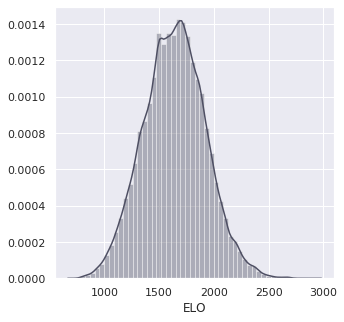

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(temp['ELO'], color ="#4e4f63")
plt.show()

In [0]:
temp.loc[temp['ELO'] >= 2200, 'ELO_RANK'] = 1
temp.loc[temp['ELO'] < 2200, 'ELO_RANK'] = 2
temp.loc[temp['ELO'] < 2000, 'ELO_RANK'] = 3
temp.loc[temp['ELO'] < 1800, 'ELO_RANK'] = 4
temp.loc[temp['ELO'] < 1600, 'ELO_RANK'] = 5

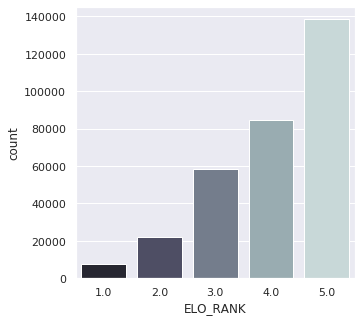

In [0]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(temp['ELO_RANK'], palette="bone")
plt.show()

In [0]:
d1 = data_combine.loc[(data_combine['TERMINATION']==0)]

In [0]:
d2 = data_combine.loc[(data_combine['TERMINATION']==1)]

In [0]:
d = pd.concat([d1, d2])

In [0]:
for i in range(0,len(d)):
  if d['GAME_TYPE'].values[i] == 1:
    d['GAME_TYPE'].values[i] = 2
  elif d['GAME_TYPE'].values[i] == 2:
    d['GAME_TYPE'].values[i] = 3
  elif d['GAME_TYPE'].values[i] == 3:
    d['GAME_TYPE'].values[i] = 1


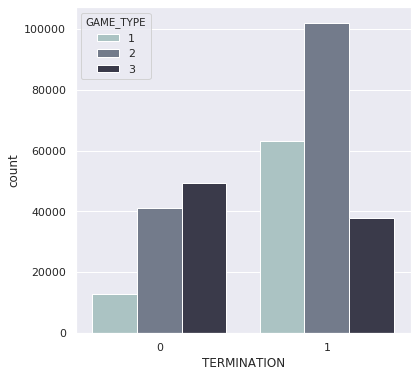

In [0]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="TERMINATION", hue="GAME_TYPE",data=d, palette='bone_r')
plt.show()

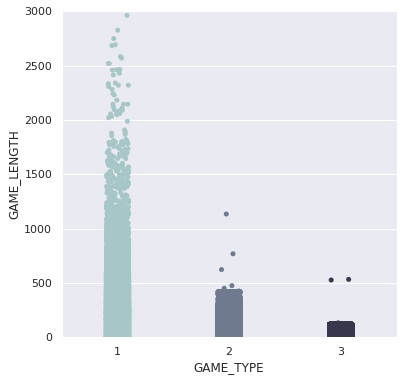

In [0]:
sns.set()
plt.figure(figsize=(6,6))
sns.stripplot(y=d["GAME_LENGTH"], x=d["GAME_TYPE"],palette='bone_r')
plt.ylim((0,3000))
plt.show()

In [0]:
sns.set()
plt.figure(figsize=(6,6))
sns.swarmplot(x=d['GAME_TYPE'], y=d['STEPS'],palette="bone_r")